In [2]:
import requests
from bs4 import BeautifulSoup

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from collections import Counter
import json,re,random
import matplotlib.pyplot as plt

#preparing the tools


ps = PorterStemmer()
lz = WordNetLemmatizer()
en_stopwords = stopwords.words('english')


In [3]:
sample_file = './reviewSamples20.json'

#data importing and formating
def process_raw_data(data_in_weird_format_file):
    with open(data_in_weird_format_file,'r') as f:
        raw_data = f.read()
    data = raw_data.split('}\n')
    return [x+'}' for x in data if x != '']
data = process_raw_data(sample_file)
print(f'Processed {len(data)} lines of data')

_sample_data = json.loads(random.choice(data))
print('\n\nSample data')
print(json.dumps(_sample_data, indent=4, sort_keys=True))

Processed 20 lines of data


Sample data
{
    "business_id": "EgwGTDZ705TwudPJwAY0yQ",
    "cool": 0,
    "date": "2011-01-09 00:07:16",
    "funny": 0,
    "review_id": "W6VRRz7mVGZLsidyHelHwg",
    "stars": 5.0,
    "text": "This place is quite possibly my favorite restaurant in Phoenix. \n\nMy favorites are the Chicken Scarpariello, the pizza and the Sangria. My wife can't decide between four dishes. Our daughter loves the Penne ala Vodka, Lasagna, or Ravioli.\n\nMario and his sons work hard to please and we've never had a bad meal here. I've seen them bend over backwards to try and take care of obvious jerks. \n\nPlus to top it off, when local school invited local pizza places to present to a class on making pizza and recycling issues, Mario came and talked to the kids as if they were adults. All the other places treated it as a marketing event and brought coupons. \n\nGet the idea? It's all good at this neighborhood gem!",
    "useful": 2,
    "user_id": "To4ATBBNlnC5gzj0dwXfuA"


In [4]:
#Check if they have the same keys
json_list = [json.loads(x) for x in data]
for i,_json in enumerate(json_list):
    print(f"{i}\t{_json.keys()}")

0	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
1	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
2	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
3	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
4	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
5	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
6	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
7	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
8	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
9	dict_keys(['review_id', 'user_id', 'business_id', 'st

In [5]:
big_data_file = './reviewSelected100.json'

big_data = process_raw_data(big_data_file)

big_json = [json.loads(x) for x in big_data]

#Collecting all unique the business id
business_id_list = list({x['business_id'] for x in big_json})  #make it a set via set comprehension {}, then call tolist

#Selecting a random business and their review
chosen_id_1 = random.choice(business_id_list)
chosen_business_1 = [x for x in big_json if x['business_id'] == chosen_id_1]

chosen_id_2 = chosen_id_1
while chosen_id_2 == chosen_id_1:
    chosen_id_2 = random.choice(business_id_list)
chosen_business_2 = [x for x in big_json if x['business_id'] == chosen_id_2]
#Because we have to repeat the whole thing for 2 businesses, we need to wrap the functions into a single wrapper for reuse


In [14]:
for y in ['useful','stars','funny','cool']:
    print({y:Counter(x[y] for x in big_json)})
    print()

{'useful': Counter({0: 8238, 1: 3265, 2: 1552, 3: 805, 4: 442, 5: 280, 6: 164, 7: 122, 8: 76, 9: 67, 10: 51, 11: 50, 12: 32, 13: 29, 14: 21, 15: 18, 16: 10, 20: 9, 19: 7, 22: 7, 23: 6, 24: 6, 18: 6, 17: 5, 21: 5, 25: 4, 30: 4, 28: 2, 34: 2, 31: 2, 27: 1, 40: 1, 65: 1, 35: 1, 46: 1, 41: 1, 48: 1, 36: 1, 85: 1, 191: 1, 43: 1, 59: 1, 64: 1})}

{'stars': Counter({5.0: 6159, 4.0: 3559, 1.0: 2306, 3.0: 1904, 2.0: 1372})}

{'funny': Counter({0: 12268, 1: 1862, 2: 563, 3: 231, 4: 107, 5: 81, 6: 61, 7: 31, 9: 21, 8: 17, 10: 10, 11: 9, 13: 6, 19: 4, 12: 4, 25: 3, 15: 3, 17: 2, 16: 2, 35: 2, 20: 2, 40: 2, 28: 2, 33: 1, 18: 1, 14: 1, 122: 1, 38: 1, 56: 1, 43: 1})}

{'cool': Counter({0: 11607, 1: 2299, 2: 734, 3: 259, 4: 115, 5: 74, 6: 57, 7: 31, 9: 27, 8: 18, 10: 15, 13: 11, 11: 10, 12: 9, 14: 5, 18: 5, 15: 3, 19: 2, 60: 2, 17: 2, 24: 2, 20: 2, 32: 1, 44: 1, 43: 1, 16: 1, 40: 1, 34: 1, 82: 1, 23: 1, 22: 1, 180: 1, 41: 1})}



In [117]:

#Wrapper for analysis  -- not too sure if the inside functions should throw outside anot it's quite task specific
def analyze_business(chosen_business):
    
    #collating all reviews into one string
    all_dem_reviews = ''.join([x['text'] for x in chosen_business])

    def clean_text(sum_string):
        s = re.sub('[\r\n\s]+',' ',sum_string) #clean whitespce and newline
        return s

    all_dem_clean_reviews = clean_text(all_dem_reviews)

    #for word distribution, we need to clean all punctuations and symbols as well as standardize the case
    def build_word_frequency(text,blacklist=[],stemmer=None):
        assert type(text) == str, "Expecting a str input"
        s = re.sub('[^a-z]+',' ',text.lower())
        s = re.sub('[\n\r\s]+',' ',s)
        vocab = Counter()
        for word in s.split(' '):
            if word in blacklist:
                continue
            if stemmer!= None:
                word = stemmer.stem(word)
            vocab.update([word])  #preventing the counter object to update using each letter by using []
        return vocab

    review_vocab_bef_stem = build_word_frequency(all_dem_clean_reviews,blacklist=en_stopwords)
    review_vocab_after_stem = build_word_frequency(all_dem_clean_reviews,blacklist=en_stopwords,stemmer = ps)

    print("Before stemming, most 10 common words:")
    for x in review_vocab_bef_stem.most_common(10):
        print('\t',x[0].ljust(15,' '),x[1])  #justify the column abit

    print('\n\n')

    print("After stemming, most 10 common words:")
    for x in review_vocab_after_stem.most_common(10):
        print('\t',x[0].ljust(15,' '),x[1])
    
    #Plotting the word distribution
    def plot_word_freq_dist(the_vocab):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        line = ax.plot(the_vocab.values())

        ax.set_yscale('log')
        plt.show()

    plot_word_freq_dist(review_vocab_after_stem)
        


Before stemming, most 10 common words:
	 food            135
	 good            72
	 buffet          63
	 place           52
	 chinese         44
	 like            39
	 service         33
	 time            33
	 back            32
	 eat             28



After stemming, most 10 common words:
	 food            135
	 buffet          76
	 good            73
	 place           57
	 chines          44
	 like            44
	 eat             40
	 go              39
	 time            35
	 servic          34


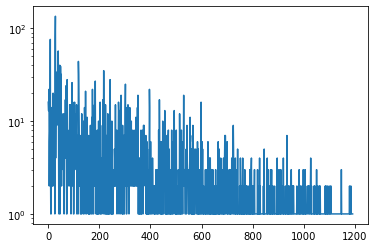

In [115]:
analyze_business(chosen_business_1)

Before stemming, most 10 common words:
	 food            115
	 service         57
	 denny           56
	 great           42
	 server          41
	 like            40
	 good            40
	 time            39
	 go              39
	 get             37



After stemming, most 10 common words:
	 food            115
	 denni           80
	 order           68
	 servic          58
	 go              57
	 time            51
	 server          51
	 get             49
	 place           47
	 like            43


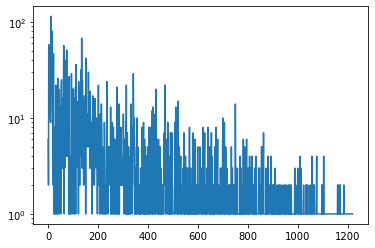

In [116]:
analyze_business(chosen_business_2)

## 3.2.2 POS Tagging

```
 git blame manekiyong
```

## 3.2.3 Writing Styles

```
git blame khengquanlim
```

## 3.2.4 WTF 

```
git blame sun aixin

consider word cloud
```

## 3.3 Indicative Adjective Phrases 

gonna need:
* Adjective pair extractor
* tf-idf 